# Best practices in data visualization - ASPP 2022, Bilbao

## Exercise 1: Mastering matplotlib

### Table of contents <a name="TOC"></a>

* [Introduction](#introduction)
* [Single axes](#single_axes)
* [Multiple axes (subplots)](#multiple_axes)
* [Exercises](#exercises)

----
This notebook is modified version from [this other one by Nicolas P. Rougier](https://github.com/ASPP/2021-bordeaux-dataviz/blob/master/01-introduction.ipynb), taught at ASPP 2021.


# 1. Introduction <a name="introduction"></a><span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

In this introduction, we'll see how to make a [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html?highlight=figure#matplotlib.pyplot.figure) and play with the different settings such as to improve the rendering. We'll also see how to compose a figure made of several [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) with a moderately complex layout.



<img src="data/anatomy.png" width="50%" align="left" /> <img src="data/subplots.png" width="50%" />

These images come from the [cheatsheets](https://github.com/matplotlib/cheatsheets).


# 2. Single axes <a name="single_axes"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>

We'll start by playing with a very simple example (sine and cosine trigonometric functions) using the [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function and see what options are avalaible to us. 

**Note** The standard way of importing maplotlib is `import matplotlib.pyplot as plt` and then use the `plt` prefix in front of matplotlib related functions. Sometimes, we also use the `matplotlib` prefix.

## 2.1 Data preparation

In this exercise, we generate our own data using the [numpy](https://numpy.org) library. With the sine and cosine functions, we generate 257 values linearly spaced between -π and +π and compute the sine and cosine of these values.

In [1]:
import numpy as np

X = np.linspace(-np.pi, np.pi, 257, endpoint=True)
C, S = np.cos(X), np.sin(X)

X is now a numpy array with 257 values ranging from -π to +π (included). C is the cosine (257 values) and S is the sine (257 values). We're ready to plot them.

## 2.2 Plotting with defaults

Let's draw our first figure and observe what the result looks like.

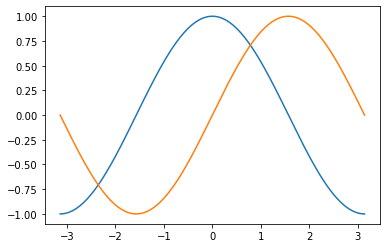

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, C)
plt.plot(X, S)
plt.show()

**Exercise together:** What aspects of this plot could be improved?

**Answer:**

**Exercise together:** We chose the value `257` arbitrarily. But what if we had chosen fewer points? The plot is below--why does it look like what it does? What does this mean for plotting? What if I plotted 25,700 points instead?

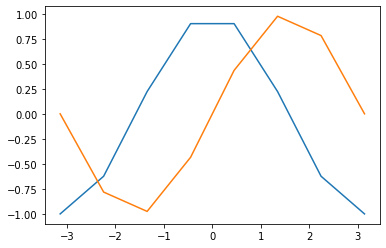

In [3]:
Xfew = np.linspace(-np.pi, np.pi, 8, endpoint=True)
Cfew, Sfew = np.cos(Xfew), np.sin(Xfew)

plt.plot(Xfew, Cfew)
plt.plot(Xfew, Sfew)
plt.show()

**Answer:** 

### 2.2.1 The two interfaces

When dealing with figures and axes, `matplotlib` has two parallel interfaces: the `pyplot` interface (`plt.xlabel`) and the object-oriented interface (`ax.set_xlabel`). The pyplot interface was developed first, and its methods are generally applied to the current axes or figure. It is recommended to use the object-oriented interface, as it is both clearer code and more flexible.

**Exercise for the reader:** The code below was written by someone who was a little unfamiliar with how matplotlib works. 
 - Question 1. Why are the lines and labels only appearing in the second plot?  
 - Question 2. Modify the code so it uses the object-oriented interface. Does the plot now look like what you'd expect?

(-3.141592653589793, 3.141592653589793)

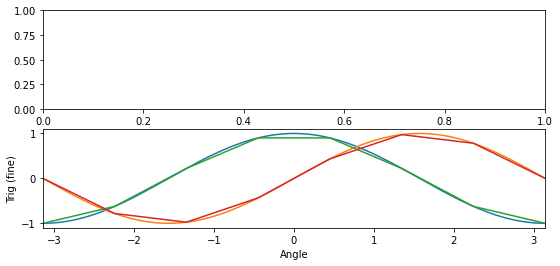

In [4]:
fig, axs = plt.subplots(2, 1, num=1, figsize=(9, 4), clear=True)

ax = axs[0]
plt.plot(X, C)
plt.plot(X, S)
plt.xlabel('Angle')
plt.ylabel('Trig (fine)')
plt.xlim([-np.pi, np.pi])

ax = axs[1]
plt.plot(Xfew, Cfew)
plt.plot(Xfew, Sfew)
plt.xlabel('Angle')
plt.ylabel('Trig (fine)')
plt.xlim([-np.pi, np.pi])

## 2.3 Using style sheets

Sometimes, there are some plotting settings that we want to apply to all of our plots. (E.g., a new color cycle, changing the axes spines to dark grey, etc.) The easiest way to do that is to use [style sheets](https://matplotlib.org/stable/tutorials/introductory/customizing.html). Matplotlib has [several built in](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html), or you can make your own once you know which values in `plt.rcParams` you want to update.

To use a style sheet for all plots in a session:
```python
plt.style.use(<sheet_name>)
```
If you want to use a style sheet on just a single plot without changing the default plot settings you can use a context manager:
```python
with plt.style.context(<sheet_name>):
    plt.plot(...)
```

**Exercise for the reader:** Copy/paste the code of one of the previous plots and using the `with` steatment explore different [style sheets from the 'seaborn' family](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) (e.g. 'seaborn-talk', 'seaborn-poster', 'seaborn-darkgrid', 'seaborn-ticks', etc)


## 2.4 Customizing the plot

As you saw in the previous section style sheets can do a lot in improving a figure, overriding matplotlib defaults. Still, none of the style sheets can address all the plot changes we want, so we sometimes still need to explicitly fine tune our settings. 

### 2.4.1 Accessing default plotting parameters

Check out the defaults from the [matplotlibrc](https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files) configuration file that is accessible through the `plt.rcParams` variable. 

**Exercise for the reader:** Run the following cell, then look at the keys the dictionary `p` contains. What is the default font size of the title? What is the default figure size?

In [5]:
p = plt.rcParams

### 2.4.2 Making custom settings

We can modify `plt.rcParams` to change default parameters. This will affect all the posterior figures. In the example below, we modify figure size, which can be specified in inches, and the DPI (dots per inch) of the figure to get a better resolution in the notebook.

(-3.141592653589793, 3.141592653589793)

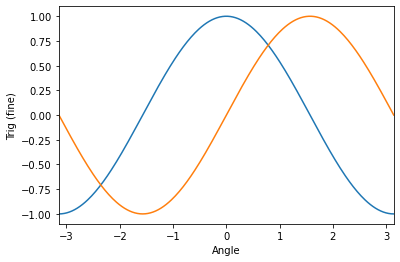

In [6]:
# Set default figure size 
plt.rcParams['figure.figsize'] = [6, 4]
# Set default figure dpi
plt.rcParams['figure.dpi'] = 72

plt.plot(X, C)
plt.plot(X, S)
plt.xlabel('Angle')
plt.ylabel('Trig (fine)')
plt.xlim([-np.pi, np.pi])

#### Line styles

Solid line is the default line style but there exist [several other styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) such as dashed lines (`linestyle="--"`), dotted lines (`linestyle=":"`), etc. You can also combine a style with a marker. For example, we can add circular markers at regular intervals. To do that, we specify the `marker` symbol as `'o'`, the marker color and the spacing between markers (else you will have a marker at each data  point). 

**Exercise for the reader:** Modify the code below to have circular markers every 32 data ponts.

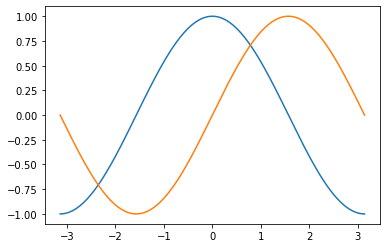

In [7]:
fig,ax = plt.subplots()

ax.plot(X, C, marker=None, markevery=None, markerfacecolor="white")
ax.plot(X, S, marker=None, markevery=None, markerfacecolor="white")

plt.show()

#### Tick positions and labels

Ticks on the x axis are not ideal positioned because they do not show the interesting values (+/-$\pi$,+/-$\pi$/2) and there are too many ticks on the y axis.

**Exercise for the reader:** Change the xticks so they only occur at multiples of π/2 and the yticks so they only occur at -1, 0 and 1. Change the xtick labels so they are multiples of π/2, and change the ytick labels to read "-1", "0", and "+1". (Hint: The methods you are looking for are `ax.set_xtick` and `ax.set_xticklabel`, and their y-axis counterparts.)

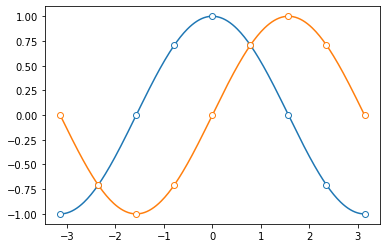

In [8]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=32, markerfacecolor="white")
ax.plot(X, S, marker="o", markevery=32, markerfacecolor="white")

plt.show()

#### Spines position

Spines are the four lines around our figure and delimiting the data area. By default, there are four spines at top/bottom and left/right but we can hide some of them and move the others.

**Exercise for the reader:** Modify the following code so that the right and top spines are no longer visible. Change the position of the bottom and left spines so that their positions are at 0 in data coordinates. (Hint: The handles to the right spine is accessible by `ax.spines['right']`. The spine object has two relevant methods for this exercise: `set_visible` and `set_position`.)

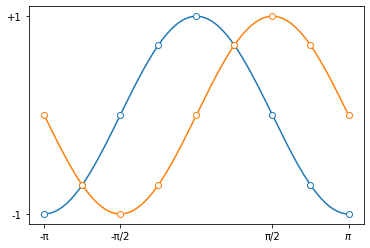

In [9]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "$π$"])
ax.set_yticks([-1,1])
ax.set_yticklabels(["-1", "+1"])

plt.show();

#### Z order

Now that our spines overlap our lines, we can see that the axes are plotted on top the lines. It was already the case previosuly but it was less noticeable. To change it, we need to tell matplotlib to render our sine and cosine plots in front of the axis. For that, we specify a **zorder**, which indicate in which order the figure elements will be rendered.

**Exercise for the reader:** Use the `zorder` keyword argument in `plot` to move the lines above the axes. Note that axes correspond to a zorder of 0.

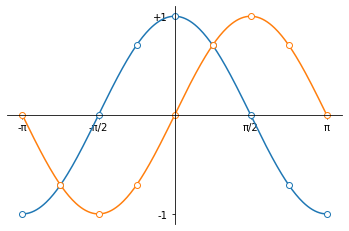

In [10]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1",  "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

plt.show()

#### Legend

Matplotlib allows adding legends with [a great degree of control](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html). For now, we will add a simple legend in the upper left-hand corner. We do this by labelling the data we plot (i.e., adding the keyword argument `label` into our `plot` function) and then calling `ax.legend`.

**Exercise for the reader**: Label the cosine and sine curves. Add a legend in the upper left corner, and use `frameon=False` to turn off the border around the legend.

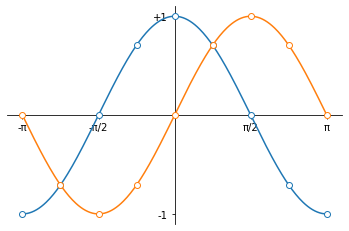

In [11]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10)
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10)

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

plt.show()

#### Font size and title

The font size of the tick labels is a bit small. Let's increase it a bit. We can also add a title on the left of our figure.

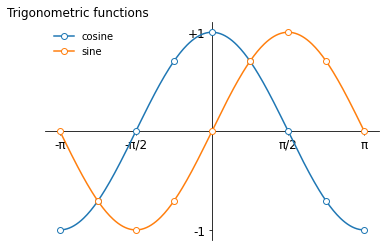

In [12]:
fig,ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="cosine")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="sine")

# Change ticks and labels
ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1", "+1"])

# Change spines location and visibility
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

# Add a legend
ax.legend(loc='upper left', frameon=False);

# Add a title
ax.set_title("Trigonometric functions", x=0.1)  

# Increase fontsize
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("large");
    
plt.show()

### 2.4.3 Saving the result

We can now save our figure in a file. There are many different figure formats, but vector graphics will produce a figure that is flawless independently of the zoom level. So let's save to a PDF.

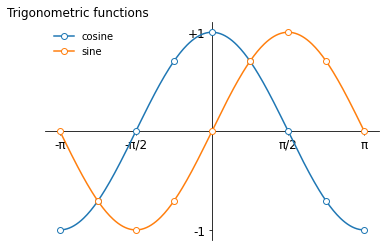

In [13]:
fig, ax = plt.subplots()

ax.plot(X, C, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="cosine")
ax.plot(X, S, marker="o", markevery=(0, 32), markerfacecolor="white",
              zorder=10, label="sine")

ax.set_xticks([-np.pi, -np.pi/2, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "π/2", "π"])
ax.set_yticks([-1, 1])
ax.set_yticklabels(["-1", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False);
ax.set_title("Trigonometric functions", x=0.1)  
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("large");

# Save the result before showing it in the notebook
plt.savefig("./01-introduction.pdf")

plt.show()

  
---
  
  
#  3. Multiple axes <a name="multiple_axes"></a> <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>

Matplotlib offers the possibility to draw several plots on the same figure.

To do that we need to create two axes. The most straigthforward way is to use the `plt.subplots` method to create subplots with the specified rows and colums. This method returns an array of axes that you can index to access the axes of your choice. You can also use the `plt.subplot` method, which is similar to the Matlab `subplot` function.

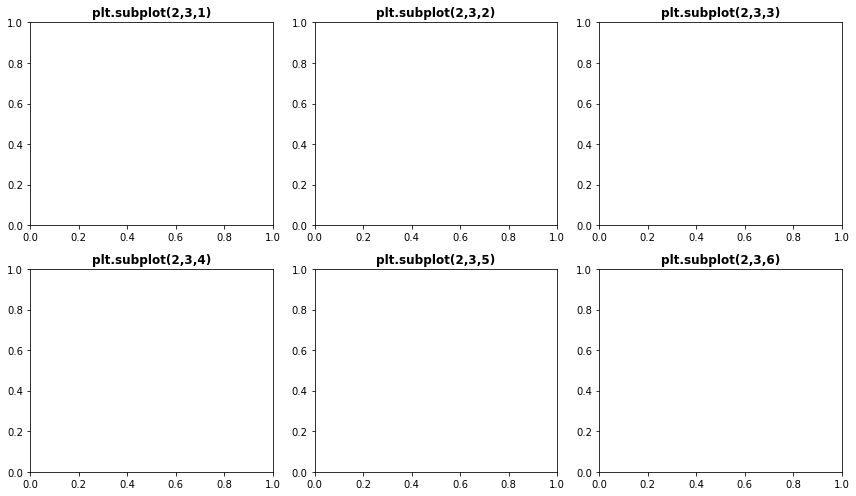

In [14]:
nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(12,7))
for index in range(nrows*ncols):
    ax = axs[index // ncols, index % ncols];
    ax.set_title("plt.subplot(%d,%d,%d)" % (nrows, ncols, index+1), weight="bold")
    
plt.tight_layout()
plt.show();

What if we want to have more complex layout with plot of unequal size? In this case, the best is to use the [gridspec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html) method. It also involves dividing the figure into rows and columns, but now we can specify the bounds of each plot, i.e. position and extent and their relative size. Let's see some example.

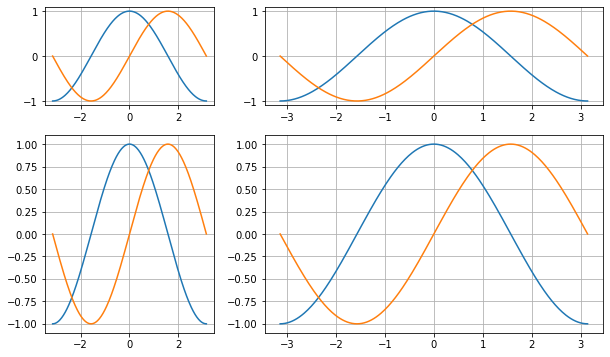

In [15]:
fig = plt.figure(figsize=(10,6))
from matplotlib.gridspec import GridSpec
    
nrows, ncols = 2, 2
widths = 1, 2  # Experiment changing 2 to 3,4,5, etc
heights = 1, 2 # Experiment changing 2 to 3,4,5, etc
G = GridSpec(nrows, ncols, width_ratios = widths, height_ratios=heights)

aspect= 'auto' # Experiment with aspect=1
ax = plt.subplot(G[0,0], aspect=aspect); ax.plot(X,C,X,S); ax.grid(1)
ax = plt.subplot(G[1,0], aspect=aspect); ax.plot(X,C,X,S); ax.grid(1)
ax = plt.subplot(G[0,1], aspect=aspect); ax.plot(X,C,X,S); ax.grid(1)
ax = plt.subplot(G[1,1], aspect=aspect); ax.plot(X,C,X,S); ax.grid(1)

plt.show();

Using gridspec, you can specify any layout, the only difficulty being to be able to express what you want to achieve.

  
---
  

# Exercises <a name="exercises"></a>  <span style="float:right;"><a class="small" style="color:black; text-decoration: none;" href="#TOC">[Back to TOC]</a></span>

## 1. Better typography 

We used π/2 to display pi over two to but it would be better to display $\frac{\pi}{2}$. How would you do modify the tick labels such a to obtain the same output as in the figure below?

**Hint:** You can edit this notebook cell to see how I wrote $\frac{\pi}{2}$.

<img src="data/01-exercise-1.png" width="100%" />

In [17]:
# your solution here:


## 2. [Optional] Better style 

Starting from the code template below, you need to write the subplot function to achieve the same result as the figure below. The only difficulty are the arrows at end of x and y axis. To plot them, you can plot them using specific [markers](https://matplotlib.org/stable/api/markers_api.html).

<img src="./../data/01-exercise-2.png" width="100%" />

In [18]:
raise Exception("!!! To be completed")

import numpy as np
import matplotlib.pyplot as plt

def subplot(index, title):    
    # To be completed HERE
    return ax

fig = plt.figure(figsize=(13,5), dpi=300)
X = np.linspace (-4,4,200)

subplot(1, "y = cos(x)").plot(X, np.cos(X), "C1")
subplot(2, "y = sin(x)").plot(X, np.sin(X), "C1")
subplot(3, "y = tan(x)").plot(X, np.tan(X), "C1")
subplot(4, "y = cosh(x)").plot(X, np.cosh(X), "C1")
subplot(5, "y = sinh(x)").plot(X, np.sinh(X), "C1")
subplot(6, "y = tanh(x)").plot(X, np.tanh(X), "C1")

plt.show()

Exception: !!! To be completed

## 3. [Optional] Making a style sheet

We've discussed using built-in style sheets and `plt.rcParams`, but we have not explored how we can generate our own style sheets. Style sheets are text files with the extension `.mplstyle` that overwrite the settings in `plt.rcParams` when loaded. Here is a partial example of a simple style sheet from [this tutorial](https://towardsdatascience.com/how-to-create-and-use-custom-matplotlib-style-sheet-9393f498063):

```
### FIGURE
figure.facecolor: white
figure.dpi: 100
figure.titleweight: bold

### LINES
lines.linewidth: 1.5

### LEGEND
legend.fontsize: 12

### AXES
axes.spines.top: True
axes.spines.right: True
axes.prop_cycle: cycler(
    'color', ['0072B2', '009E73', 'D55E00', 'CC79A7', 'F0E442', '56B4E9']
)
```

Your exercise is to make your own style sheet. Use the `defaults` function we wrote above to explore which options are available, and save the values into a local sheet. Test the style sheet in the function below.



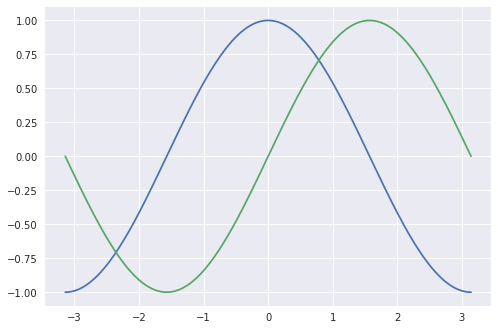

In [19]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-np.pi, np.pi, 257, endpoint=True)
C, S = np.cos(X), np.sin(X)

with plt.style.context('seaborn'): # use here your stylesheet!
    plt.plot(X, C, label='cosine')
    plt.plot(X, S, label='sine')

----
This notebook is modified version from [this other one](https://github.com/ASPP/2021-bordeaux-dataviz/blob/master/01-introduction.ipynb), taught at ASPP 2021.

**Copyright (c) 2021 Nicolas P. Rougier**  
This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).
<br/>
Code is licensed under a [2-Clauses BSD license](https://opensource.org/licenses/BSD-2-Clause)
